# Import Libraries 

In [1]:
# Import Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
  
# Import Core Libraries - Machine Learning
import sklearn


# Import Clustering Algorithms
from sklearn.cluster import KMeans

# Import Classifiers - Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Import train_test_split,cross_val_score,GridSearchCV,KFold - Validation and Optimization
from sklearn.model_selection import  train_test_split, cross_val_score, GridSearchCV, KFold 

# Feature Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# from imblearn.over_sampling import 

# Importing Metrics - Performance Evaluation
from sklearn import metrics

# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


In [3]:
%matplotlib inline 

# Load Data


In [4]:
train_data_in = pd.read_excel("Training dataset.xlsx")
train_data_out = pd.read_excel("Training outputs.xlsx")

# Understand the Dataset

In [5]:
train_data_in.shape, train_data_out.shape

((1537, 591), (1537, 2))

In [6]:
train_data_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Columns: 591 entries, Unnamed: 0 to Sensor-590
dtypes: float64(590), object(1)
memory usage: 6.9+ MB


## Column Information

In [7]:
train_data_in.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-581', 'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585',
       'Sensor-586', 'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590'],
      dtype='object', length=591)

In [8]:
train_data_out.columns

Index(['Unnamed: 0', 'Good/Bad'], dtype='object')

## Row Information

In [9]:
train_data_in.isna().sum()

Unnamed: 0      0
Sensor-1        6
Sensor-2        7
Sensor-3       14
Sensor-4       14
Sensor-5       14
Sensor-6       14
Sensor-7       14
Sensor-8        9
Sensor-9        2
Sensor-10       2
Sensor-11       2
Sensor-12       2
Sensor-13       2
Sensor-14       3
Sensor-15       3
Sensor-16       3
Sensor-17       3
Sensor-18       3
Sensor-19       3
Sensor-20       9
Sensor-21       0
Sensor-22       2
Sensor-23       2
Sensor-24       2
Sensor-25       2
Sensor-26       2
Sensor-27       2
Sensor-28       2
Sensor-29       2
             ... 
Sensor-561      1
Sensor-562      1
Sensor-563    262
Sensor-564    262
Sensor-565    262
Sensor-566    262
Sensor-567    262
Sensor-568    262
Sensor-569    262
Sensor-570    262
Sensor-571      0
Sensor-572      0
Sensor-573      0
Sensor-574      0
Sensor-575      0
Sensor-576      0
Sensor-577      0
Sensor-578      0
Sensor-579    942
Sensor-580    942
Sensor-581    942
Sensor-582    942
Sensor-583      1
Sensor-584      1
Sensor-585

In [10]:
train_data_in.isna().sum().idxmax(), train_data_in.isna().sum().max()

('Sensor-158', 1399)

In [11]:
train_data_in.isna().sum().describe()

count     591.000000
mean       69.595601
std       236.395985
min         0.000000
25%         2.000000
50%         6.000000
75%         9.000000
max      1399.000000
dtype: float64

In [12]:
train_data_out.isna().sum()

Unnamed: 0    0
Good/Bad      0
dtype: int64

### Visualizing Missing Values(NaN) in Rows

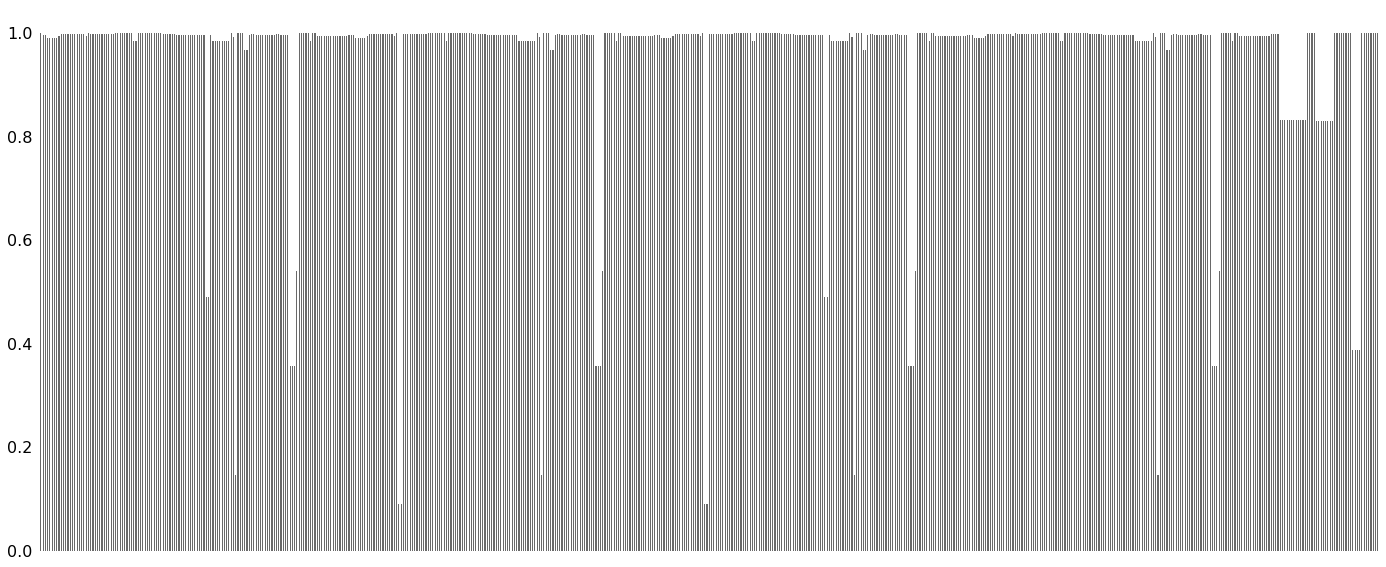

In [13]:
msno.bar(train_data_in)

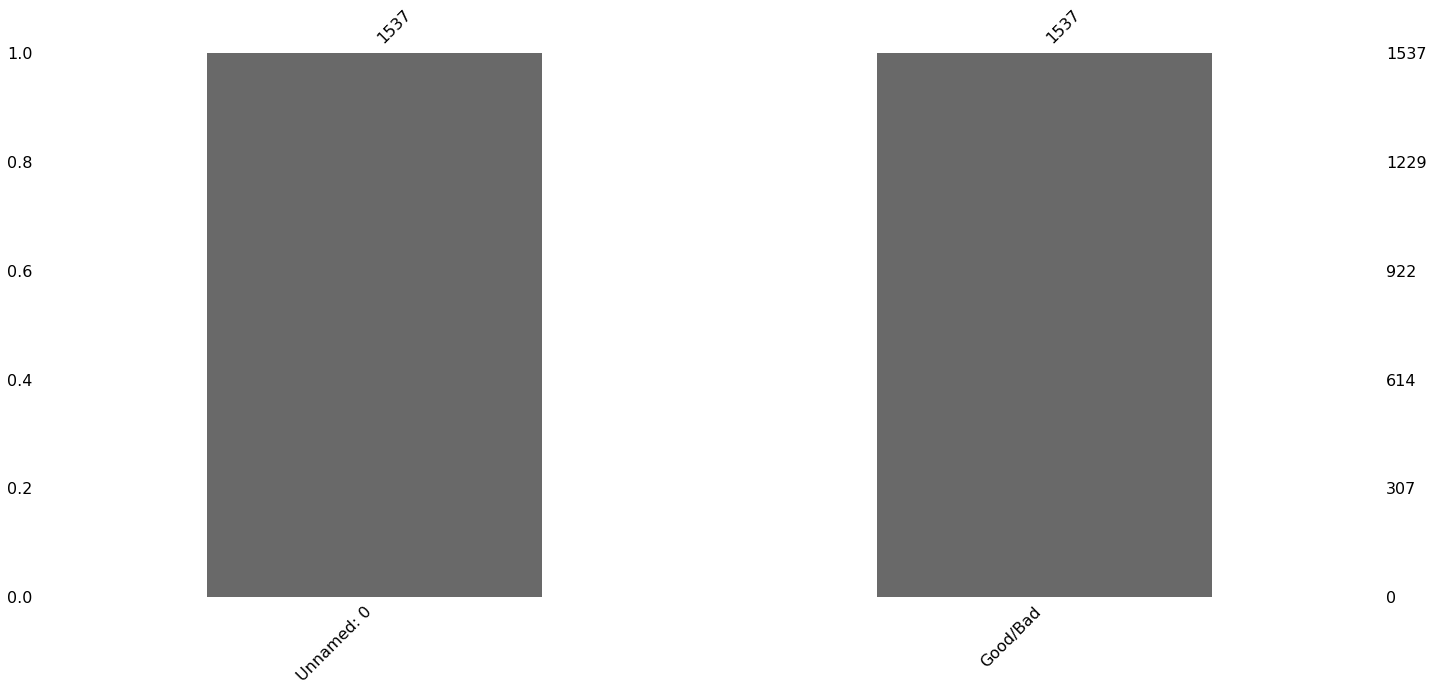

In [14]:
msno.bar(train_data_out)

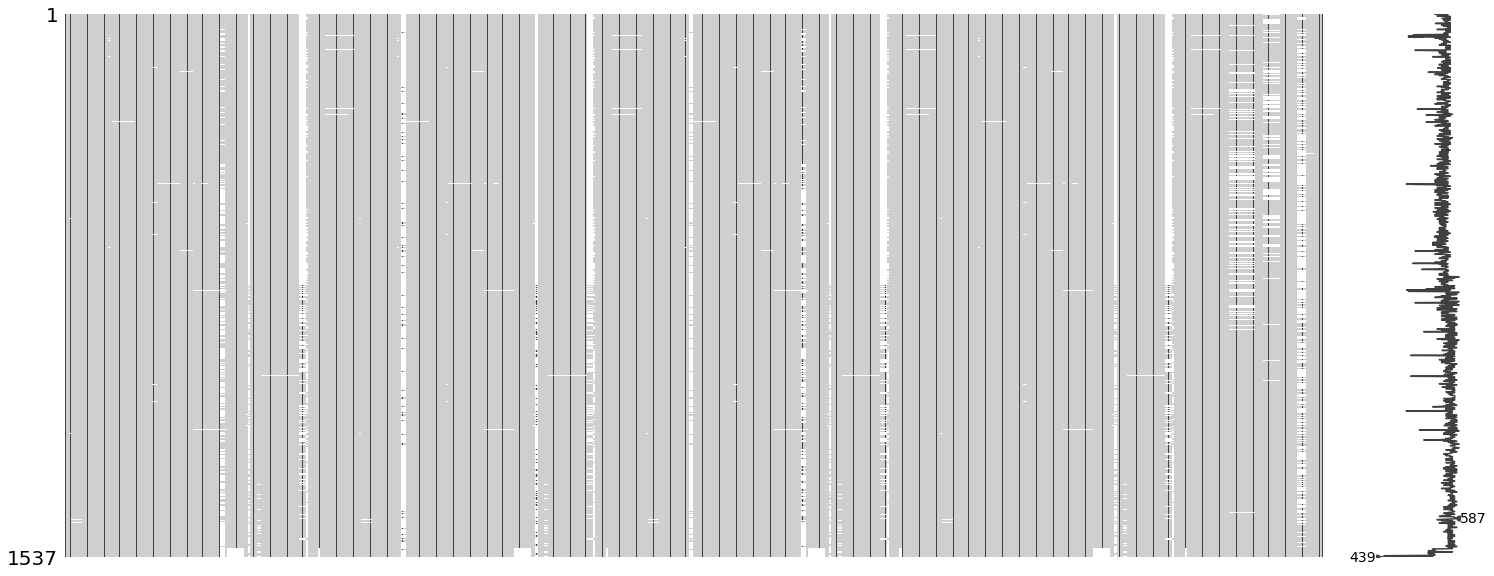

In [15]:
msno.matrix(train_data_in)

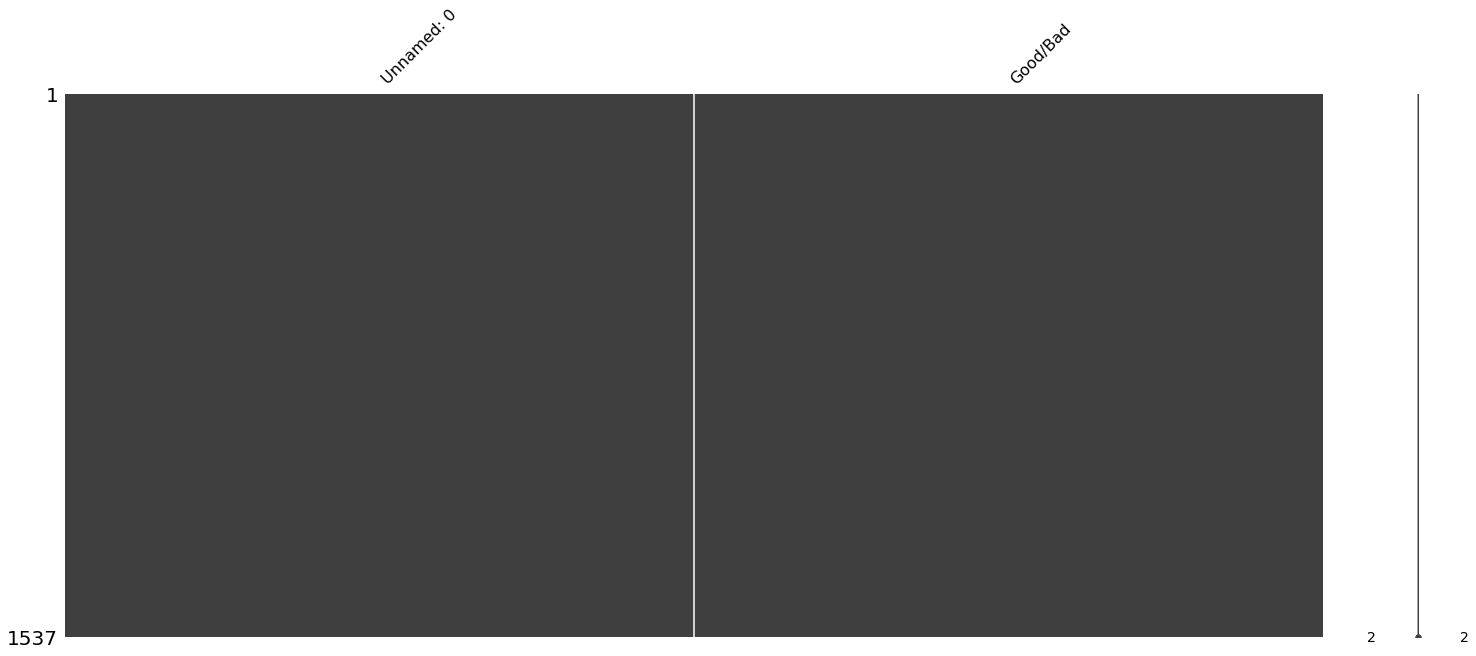

In [16]:
msno.matrix(train_data_out)

# Get Basic Statistical Information

In [17]:
train_data_in.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
count,1531.000000,1530.000000,1523.000000,1523.000000,1523.000000,1523.0,1523.000000,1528.000000,1535.000000,1535.000000,...,595.000000,595.000000,1536.000000,1536.000000,1536.000000,1536.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,3015.024193,2495.483771,2200.370187,1400.184797,4.255665,100.0,101.062428,0.121817,1.461905,-0.000798,...,0.005352,97.796315,0.500105,0.015029,0.003782,3.007635,0.021432,0.016414,0.005268,99.777881
std,73.908774,80.495576,29.461460,443.937101,56.906664,0.0,6.267841,0.009045,0.074078,0.015020,...,0.003110,88.689937,0.003357,0.012700,0.002733,2.641657,0.012398,0.008768,0.002865,94.560344
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2967.465000,2452.182500,2180.966600,1084.377900,1.017700,100.0,97.840000,0.121100,1.410300,-0.010650,...,0.003300,45.833000,0.497900,0.011600,0.003100,2.309525,0.013400,0.010600,0.003300,44.235500
50%,3012.090000,2498.840000,2200.988900,1287.353800,1.316800,100.0,101.492200,0.122400,1.460700,-0.001300,...,0.004600,71.533300,0.500150,0.013800,0.003600,2.758950,0.020700,0.014800,0.004600,71.575300
75%,3057.390000,2538.500000,2217.866700,1593.122000,1.529100,100.0,104.525550,0.123800,1.516400,0.008300,...,0.006400,116.888550,0.502325,0.016500,0.004100,3.295575,0.027600,0.020300,0.006400,115.100500
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.471400,0.103900,98.662800,0.102800,0.079900,0.028600,737.304800


In [18]:
train_data_in.describe(include = 'object')

,Unnamed: 0
count,1537
unique,1537
top,Wafer-66
freq,1


In [19]:
train_data_out.describe()

,Good/Bad
count,1537.00000
mean,-0.88419
std,0.46728
min,-1.00000
25%,-1.00000
50%,-1.00000
75%,-1.00000
max,1.00000


In [20]:
train_data_out.describe(include = 'object')

,Unnamed: 0
count,1537
unique,1537
top,Wafer-66
freq,1


# Data Cleaning

## Cleaning Columns

### Rename 1st column(Unnamed: 0) to wafer_id in both dataframes

In [21]:
train_data_in.rename({"Unnamed: 0":"wafer_id"}, axis = 1, inplace = True)

In [22]:
train_data_in["wafer_id"].head()

0    Wafer-1
1    Wafer-2
2    Wafer-3
3    Wafer-4
4    Wafer-5
Name: wafer_id, dtype: object

In [23]:
train_data_out.rename({"Unnamed: 0":"wafer_id","Good/Bad":"good_bad"}, axis = 1, inplace = True)

In [24]:
train_data_out["wafer_id"].head()

0    Wafer-1
1    Wafer-2
2    Wafer-3
3    Wafer-4
4    Wafer-5
Name: wafer_id, dtype: object

In [25]:
train_data_out.good_bad

0      -1
1      -1
2      -1
3      -1
4      -1
5      -1
6      -1
7      -1
8      -1
9      -1
10     -1
11     -1
12     -1
13     -1
14     -1
15     -1
16     -1
17     -1
18     -1
19     -1
20     -1
21     -1
22     -1
23     -1
24     -1
25     -1
26     -1
27     -1
28     -1
29     -1
       ..
1507   -1
1508   -1
1509   -1
1510   -1
1511   -1
1512   -1
1513   -1
1514   -1
1515   -1
1516   -1
1517   -1
1518   -1
1519   -1
1520   -1
1521   -1
1522   -1
1523   -1
1524   -1
1525   -1
1526   -1
1527   -1
1528   -1
1529   -1
1530   -1
1531   -1
1532   -1
1533   -1
1534   -1
1535   -1
1536   -1
Name: good_bad, Length: 1537, dtype: int64

## Change Indices

### Create new dataframes with the wafer_id values as indices for both the dataframes

In [26]:
data_wafer_in = train_data_in.set_index("wafer_id", drop = True, verify_integrity = True)
data_wafer_out = train_data_out.set_index("wafer_id", drop = True, verify_integrity = True)

In [27]:
data_wafer_in.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
wafer_id,,,,,,,,,,,,,,,,,,,,,
Wafer-1,2988.30,2519.05,2208.8556,1157.7224,1.5509,100.0,107.8022,0.1233,1.5362,-0.0259,...,0.0032,47.1586,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586
Wafer-2,2987.32,2528.81,NaN,NaN,NaN,NaN,NaN,0.1195,1.6343,-0.0263,...,NaN,NaN,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586
Wafer-3,NaN,2481.85,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5559,0.0002,...,0.0023,34.4153,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153
Wafer-4,3002.27,2497.45,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5465,0.0195,...,0.0075,114.5979,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979
Wafer-5,3010.41,2632.80,2203.9000,1116.4129,1.2639,100.0,102.2733,0.1199,1.4227,0.0194,...,0.0101,125.0600,0.5032,0.0159,0.0039,3.1576,0.0288,0.0361,0.0101,125.0600


In [28]:
data_wafer_out.head()

,good_bad
wafer_id,
Wafer-1,-1
Wafer-2,-1
Wafer-3,-1
Wafer-4,-1
Wafer-5,-1


## Cleaning the Rows

### Impute NaN Values Using Pandas Interpolate Function

In [29]:
#clean_input = data_wafer_in.interpolate(method='nearest', axis=0, limit_direction='forward')data_wafer_in

### Impute NaN Values Using Scikit-learn Iterative Imputer of Input Dataframe

In [30]:
imp = IterativeImputer(random_state = 0,verbose= 2)

In [31]:
imp.fit(data_wafer_in)

[IterativeImputer] Completing matrix with shape (1537, 590)
[IterativeImputer] Ending imputation round 1/10, elapsed time 154.84
[IterativeImputer] Ending imputation round 2/10, elapsed time 298.88
[IterativeImputer] Ending imputation round 3/10, elapsed time 451.40
[IterativeImputer] Ending imputation round 4/10, elapsed time 669.81
[IterativeImputer] Ending imputation round 5/10, elapsed time 889.57
[IterativeImputer] Ending imputation round 6/10, elapsed time 1107.12
[IterativeImputer] Ending imputation round 7/10, elapsed time 1298.67
[IterativeImputer] Ending imputation round 8/10, elapsed time 1492.42
[IterativeImputer] Ending imputation round 9/10, elapsed time 1713.32
[IterativeImputer] Ending imputation round 10/10, elapsed time 1940.06


IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=2)

In [32]:
data_wafer_in_imputed = imp.transform(data_wafer_in)

[IterativeImputer] Completing matrix with shape (1537, 590)
[IterativeImputer] Ending imputation round 1/10, elapsed time 4.65
[IterativeImputer] Ending imputation round 2/10, elapsed time 8.56
[IterativeImputer] Ending imputation round 3/10, elapsed time 12.22
[IterativeImputer] Ending imputation round 4/10, elapsed time 16.12
[IterativeImputer] Ending imputation round 5/10, elapsed time 19.65
[IterativeImputer] Ending imputation round 6/10, elapsed time 23.41
[IterativeImputer] Ending imputation round 7/10, elapsed time 27.16
[IterativeImputer] Ending imputation round 8/10, elapsed time 30.35
[IterativeImputer] Ending imputation round 9/10, elapsed time 33.75
[IterativeImputer] Ending imputation round 10/10, elapsed time 37.43


In [33]:
clean_input = pd.DataFrame(data_wafer_in_imputed, index = data_wafer_in.index, columns = data_wafer_in.columns.values)

In [34]:
clean_input.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
wafer_id,,,,,,,,,,,,,,,,,,,,,
Wafer-1,2988.300000,2519.05,2208.855600,1157.722400,1.550900,100.0,107.802200,0.1233,1.5362,-0.0259,...,0.00320,47.158600,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586
Wafer-2,2987.320000,2528.81,2207.664539,1447.761663,4.337339,100.0,99.278117,0.1195,1.6343,-0.0263,...,0.00333,47.158591,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586
Wafer-3,2958.254978,2481.85,2207.388900,962.531700,1.204300,100.0,104.031100,0.1210,1.5559,0.0002,...,0.00230,34.415300,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153
Wafer-4,3002.270000,2497.45,2207.388900,962.531700,1.204300,100.0,104.031100,0.1210,1.5465,0.0195,...,0.00750,114.597900,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979
Wafer-5,3010.410000,2632.80,2203.900000,1116.412900,1.263900,100.0,102.273300,0.1199,1.4227,0.0194,...,0.01010,125.060000,0.5032,0.0159,0.0039,3.1576,0.0288,0.0361,0.0101,125.0600


In [35]:
clean_input.columns

Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
       'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10',
       ...
       'Sensor-581', 'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585',
       'Sensor-586', 'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590'],
      dtype='object', length=590)

### Clean the Values of Output Dataframe

In [36]:
clean_output = data_wafer_out.replace(-1, 0)

# Removing Irrelevant Features

## Identifying columns where there is only one value, or only 1 unique variable. Remove them

In [37]:
input_cols = clean_input.columns.values

In [38]:
col_uniq = [(col,len(clean_input[col].unique())) for col in  clean_input.columns.values]

In [39]:
col_uniq_df = pd.DataFrame(data=col_uniq, columns = ["Sensor_id","uniq"])

In [40]:
col_uniq_df.shape

(590, 2)

In [41]:
col_uniq_df[col_uniq_df["uniq"]>1].shape

(474, 2)

In [42]:
select_cols = col_uniq_df[col_uniq_df["uniq"]>1]["Sensor_id"] # Selecting and saving column names with more than 1 unique value

In [43]:
good_input = clean_input[select_cols]

In [44]:
good_input.shape

(1537, 474)

# Combine the imputed and clean df along with output df and then save it as a csv or excel file for use later on

In [45]:
cleaned_df = good_input.join(clean_output, on = good_input.index)

In [47]:
cleaned_df.to_csv("cleaned dataset.csv", index = True)

***With this, we completed Data Cleaning and EDA. This data will be used for feature processing and model development***

# Feature Processing


## Loading the cleaned data from the cleaned dataset CSV file

In [5]:
clean_data = pd.read_csv("cleaned dataset.csv")

In [6]:
clean_data.shape

(1537, 476)

In [7]:
clean_data.head()

,wafer_id,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,good_bad
0,Wafer-1,2988.300000,2519.05,2208.855600,1157.722400,1.550900,107.802200,0.1233,1.5362,-0.0259,...,47.158600,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586,0
1,Wafer-2,2987.320000,2528.81,2207.664539,1447.761663,4.337339,99.278117,0.1195,1.6343,-0.0263,...,47.158591,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586,0
2,Wafer-3,2958.254978,2481.85,2207.388900,962.531700,1.204300,104.031100,0.1210,1.5559,0.0002,...,34.415300,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153,0
3,Wafer-4,3002.270000,2497.45,2207.388900,962.531700,1.204300,104.031100,0.1210,1.5465,0.0195,...,114.597900,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979,0
4,Wafer-5,3010.410000,2632.80,2203.900000,1116.412900,1.263900,102.273300,0.1199,1.4227,0.0194,...,125.060000,0.5032,0.0159,0.0039,3.1576,0.0288,0.0361,0.0101,125.0600,0


## Removing the wafer_id column

In [8]:
good_data = clean_data.drop("wafer_id", axis = 1)

In [9]:
good_data.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,good_bad
0,2988.300000,2519.05,2208.855600,1157.722400,1.550900,107.802200,0.1233,1.5362,-0.0259,-0.0179,...,47.158600,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586,0
1,2987.320000,2528.81,2207.664539,1447.761663,4.337339,99.278117,0.1195,1.6343,-0.0263,0.0116,...,47.158591,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586,0
2,2958.254978,2481.85,2207.388900,962.531700,1.204300,104.031100,0.1210,1.5559,0.0002,-0.0044,...,34.415300,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153,0
3,3002.270000,2497.45,2207.388900,962.531700,1.204300,104.031100,0.1210,1.5465,0.0195,-0.0114,...,114.597900,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979,0
4,3010.410000,2632.80,2203.900000,1116.412900,1.263900,102.273300,0.1199,1.4227,0.0194,0.0073,...,125.060000,0.5032,0.0159,0.0039,3.1576,0.0288,0.0361,0.0101,125.0600,0


## Preparing data for scaling

In [10]:
# scale_X = good_data.drop("good_bad", axis = 1)
# scale_Y = good_data["good_bad"]

## Scaling the Input Vector 

In [11]:
# minmax_scaler = MinMaxScaler()
# minmax_scaler.fit(scale_X)
# minmax = minmax_scaler.transform(scale_X)

In [12]:
# scaled_X = pd.DataFrame(minmax, columns = scale_X.columns.values)

In [13]:
# scaled_data = scaled_X.join(scale_Y, on = scale_Y.index)

## Handling Imbalanced Data 

In [14]:
good_data["good_bad"].value_counts()

0    1448
1      89
Name: good_bad, dtype: int64

***It is an imbalanced dataset***

In [16]:
imb_class_data = good_data[good_data["good_bad"]==1]

In [17]:
imb_class_data.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,good_bad
52,2971.99,2502.62,2239.3000,1192.7495,1.2479,100.1189,0.1187,1.5824,-0.0006,0.0064,...,15.290900,0.4955,0.0094,0.0031,1.8952,0.0278,0.0042,0.0016,15.2909,1
66,2992.40,2467.07,2191.6667,1107.4330,1.3529,103.4233,0.1206,1.4993,-0.0091,0.0006,...,192.298500,0.4996,0.0326,0.0065,6.5274,0.0095,0.0184,0.0062,192.2985,1
85,3002.85,2502.05,2232.5889,1717.2750,1.6700,104.1067,0.1223,1.4518,0.0066,0.0151,...,45.683500,0.4995,0.0093,0.0026,1.8612,0.0364,0.0166,0.0042,45.6835,1
101,3003.13,2714.30,2171.9000,1811.8799,1.3811,99.2200,0.1276,1.4240,-0.0080,0.0074,...,289.923400,0.4990,0.0119,0.0027,2.3794,0.0058,0.0169,0.0060,289.9234,1
124,2973.86,2359.01,2196.6555,1066.1908,1.2188,101.8900,0.1211,1.4544,-0.0052,-0.0003,...,58.566509,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1


### Handling the imbalance by Resampling the imbalanced class data

In [91]:
balanced_data = good_data # Initializing balanced data

In [92]:
repeat_resample_no = 4

In [93]:
for i in range(0,repeat_resample_no):
    balanced_data = balanced_data.append(imb_class_data)


In [94]:
 balanced_data.shape

(1893, 475)

# Create Input Vector X and output vector Y and Split the Data for Training and Testing

In [95]:
X = balanced_data.drop("good_bad", axis = 1)
Y = balanced_data["good_bad"]

In [96]:
X.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,2988.300000,2519.05,2208.855600,1157.722400,1.550900,107.802200,0.1233,1.5362,-0.0259,-0.0179,...,0.00320,47.158600,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586
1,2987.320000,2528.81,2207.664539,1447.761663,4.337339,99.278117,0.1195,1.6343,-0.0263,0.0116,...,0.00333,47.158591,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586
2,2958.254978,2481.85,2207.388900,962.531700,1.204300,104.031100,0.1210,1.5559,0.0002,-0.0044,...,0.00230,34.415300,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153
3,3002.270000,2497.45,2207.388900,962.531700,1.204300,104.031100,0.1210,1.5465,0.0195,-0.0114,...,0.00750,114.597900,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979
4,3010.410000,2632.80,2203.900000,1116.412900,1.263900,102.273300,0.1199,1.4227,0.0194,0.0073,...,0.01010,125.060000,0.5032,0.0159,0.0039,3.1576,0.0288,0.0361,0.0101,125.0600


In [97]:
x_train,x_test,y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100)

In [98]:
x_train.shape, y_train.shape

((1419, 474), (1419,))

In [99]:
x_test.shape, y_test.shape

((474, 474), (474,))

# Create a Dataframe With Minmax Scaling for Classification

In [100]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [101]:
x_train = pd.DataFrame(x_train_scaled, index = x_train.index.values, columns = x_train.columns.values)

In [102]:
x_test_scaled  = scaler.transform(x_test)

In [103]:
x_test = pd.DataFrame(x_test_scaled, index = x_test.index.values, columns = x_test.columns.values)

# Fit Models and Collect Metrics

## Fit Base Models

### Define Base Models and Variables to Collect Metrics

In [104]:
classifiers = [
            ("Logistic Regression - ", LogisticRegression()),
            ("K-Nearest Neighbors - ",  KNeighborsClassifier(2)),
            ("Naive Bayes - ",  GaussianNB()),
            ("Decision Tree - ",  DecisionTreeClassifier(max_depth=5)),
            ("Random Forest - ",  RandomForestClassifier(n_estimators=100)),
            ("AdaBoost - ",  AdaBoostClassifier(n_estimators=100)),
            ("XGBoost - ", XGBClassifier(n_estimators=100,objective='binary:logistic',scale_pos_weight = 0.06))]

acc_base = []
bal_acc_base = []
f1_base = []
precision_base = []
recall_base = []
roc_auc_base = []
conf_matrix_base = []
clf_report_base = []

In [105]:
model_names = [i[0] for i in classifiers] # Model names for plotting

In [106]:
# Generate model evaluation metrics
print("Base Models")
print('='*60)
for clf in classifiers:
    
    # Fit using Train Data
    clf[1].fit(x_train, y_train)
    # Get Predicted Train Values
    y_train_pred= clf[1].predict(x_train)
    y_train_pred_prob= clf[1].predict_proba(x_train)

    # Get Predicted Test Values
    y_test_pred= clf[1].predict(x_test)
    y_test_pred_prob= clf[1].predict_proba(x_test)
    # Printing the metrics
    print(clf[0])
    print("-"*60)
    print("Train Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
    print("Test Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
    print()
    
    print("Train Balanced Accuracy: ",metrics.balanced_accuracy_score(y_train, y_train_pred)),
    print("Test Balanced Accuracy: ",metrics.balanced_accuracy_score(y_test, y_test_pred)),
    print()
    
    print("Train f1 Score: ",metrics.f1_score(y_train, y_train_pred))
    print("Test f1 Score: ",metrics.f1_score(y_test, y_test_pred))
    print()
    
    print("Train Precision Score: ",metrics.precision_score(y_train, y_train_pred))
    print("Test Precision Score: ",metrics.precision_score(y_test, y_test_pred))
    print()
    
    print("Train Recall Score: ",metrics.recall_score(y_train, y_train_pred))
    print("Test Recall Score: ",metrics.recall_score(y_test, y_test_pred))
    print()
    
    print("Train ROC-AUC Score: ",metrics.roc_auc_score(y_train, y_train_pred_prob[:,1]))
    print("Test ROC-AUC Score: ",metrics.roc_auc_score(y_test, y_test_pred_prob[:,1]))
    print()
    
    print("Train Confusion Matrix:  \n ",metrics.confusion_matrix(y_train, y_train_pred))
    print()
    print("Test Confusion Matrix:  \n ",metrics.confusion_matrix(y_test, y_test_pred))
    print()
    
    print("Train Classification Report:\n ",metrics.classification_report(y_train, y_train_pred))
    print("Test Classification Report:\n ",metrics.classification_report(y_test, y_test_pred))
    print("-"*60)
    
    # Collecting the test metrics into a list
    acc_base.append(metrics.accuracy_score(y_test, y_test_pred))
    bal_acc_base.append(metrics.balanced_accuracy_score(y_test, y_test_pred))
    f1_base.append(metrics.f1_score(y_test, y_test_pred))
    precision_base.append(metrics.precision_score(y_test, y_test_pred))
    recall_base.append(metrics.recall_score(y_test, y_test_pred))
    roc_auc_base.append(metrics.roc_auc_score(y_test, y_test_pred))
    conf_matrix_base.append (metrics.confusion_matrix(y_test, y_test_pred))
    clf_report_base.append(metrics.classification_report(y_test, y_test_pred))
 

Base Models
Logistic Regression - 
------------------------------------------------------------
Train Accuracy:  0.8893587033121917
Test Accuracy:  0.8291139240506329

Train Balanced Accuracy:  0.7936435992568436
Test Balanced Accuracy:  0.7183216948751332

Train f1 Score:  0.7191413237924866
Test f1 Score:  0.592964824120603

Train Precision Score:  0.8626609442060086
Test Precision Score:  0.7375

Train Recall Score:  0.6165644171779141
Test Recall Score:  0.4957983193277311

Train ROC-AUC Score:  0.954706189415073
Test ROC-AUC Score:  0.8972186057521601

Train Confusion Matrix:  
  [[1061   32]
 [ 125  201]]

Test Confusion Matrix:  
  [[334  21]
 [ 60  59]]

Train Classification Report:
                precision    recall  f1-score   support

           0       0.89      0.97      0.93      1093
           1       0.86      0.62      0.72       326

    accuracy                           0.89      1419
   macro avg       0.88      0.79      0.83      1419
weighted avg       0.89   

XGBoost - 
------------------------------------------------------------
Train Accuracy:  0.8393234672304439
Test Accuracy:  0.7953586497890295

Train Balanced Accuracy:  0.6503067484662577
Test Balanced Accuracy:  0.592436974789916

Train f1 Score:  0.4622641509433962
Test f1 Score:  0.3120567375886525

Train Precision Score:  1.0
Test Precision Score:  1.0

Train Recall Score:  0.3006134969325153
Test Recall Score:  0.18487394957983194

Train ROC-AUC Score:  0.9989419563423683
Test ROC-AUC Score:  0.9902710379926618

Train Confusion Matrix:  
  [[1093    0]
 [ 228   98]]

Test Confusion Matrix:  
  [[355   0]
 [ 97  22]]

Train Classification Report:
                precision    recall  f1-score   support

           0       0.83      1.00      0.91      1093
           1       1.00      0.30      0.46       326

    accuracy                           0.84      1419
   macro avg       0.91      0.65      0.68      1419
weighted avg       0.87      0.84      0.80      1419

Test Classi

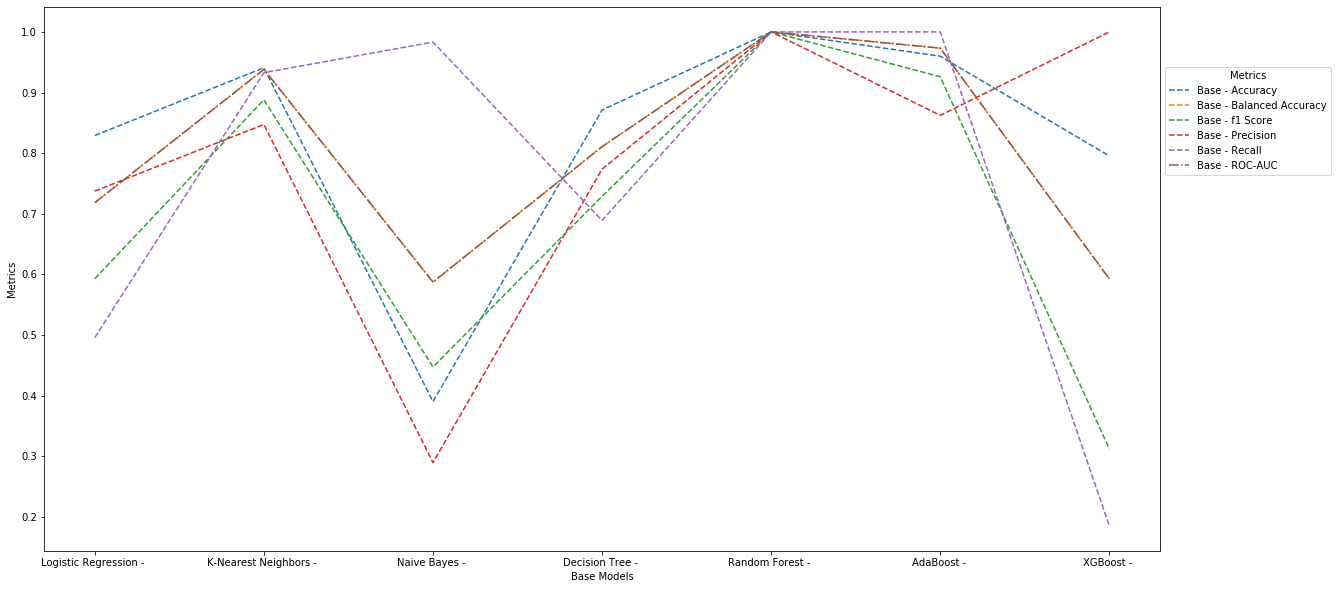

In [107]:
# Plotting the classification metrics for all the base models
plt.figure(figsize=(20,10))

plt.plot(model_names , acc_base, label = "Base - Accuracy", linestyle='dashed')
plt.plot(model_names , bal_acc_base, label = "Base - Balanced Accuracy", linestyle='dashed')
plt.plot(model_names , f1_base, label = "Base - f1 Score", linestyle='dashed')
plt.plot(model_names , precision_base, label = "Base - Precision", linestyle='dashed')
plt.plot(model_names , recall_base, label = "Base - Recall", linestyle='dashed')
plt.plot(model_names , roc_auc_base, label = "Base - ROC-AUC", linestyle='-.')
plt.xlabel("Base Models")
plt.ylabel("Metrics")
plt.legend(title= "Metrics", bbox_to_anchor=(1.0, 0.9), fancybox = True)

# Validate Models

In [108]:
scoring = 'balanced_accuracy'
results=[]
names=[]
for classifier_name, model in classifiers:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(classifier_name)
    print(classifier_name,
                      "\n\t CV-Mean:", cv_results.mean(),
                    "\n\t CV-Std. Dev:",  cv_results.std(),"\n")

Logistic Regression -  
	 CV-Mean: 0.7431120848319168 
	 CV-Std. Dev: 0.05603590159953952 

K-Nearest Neighbors -  
	 CV-Mean: 0.9382770756374329 
	 CV-Std. Dev: 0.02994481253370491 

Naive Bayes -  
	 CV-Mean: 0.5795906655750335 
	 CV-Std. Dev: 0.01434732280890386 

Decision Tree -  
	 CV-Mean: 0.764347665117556 
	 CV-Std. Dev: 0.05301369480872858 

Random Forest -  
	 CV-Mean: 0.9968660968660968 
	 CV-Std. Dev: 0.006395995532946921 

AdaBoost -  
	 CV-Mean: 0.9712567845016695 
	 CV-Std. Dev: 0.0104717498176895 

XGBoost -  
	 CV-Mean: 0.5885384356909735 
	 CV-Std. Dev: 0.02339733227653731 



In [109]:
scoring = 'f1'
results=[]
names=[]
for classifier_name, model in classifiers:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(classifier_name)
    print(classifier_name,
                      "\n\t CV-Mean:", cv_results.mean(),
                    "\n\t CV-Std. Dev:",  cv_results.std(),"\n")

Logistic Regression -  
	 CV-Mean: 0.61929719193864 
	 CV-Std. Dev: 0.08647289468840028 

K-Nearest Neighbors -  
	 CV-Mean: 0.8712198078469735 
	 CV-Std. Dev: 0.0383728508257823 

Naive Bayes -  
	 CV-Mean: 0.41264586556942806 
	 CV-Std. Dev: 0.04562531664601011 

Decision Tree -  
	 CV-Mean: 0.6490814434130856 
	 CV-Std. Dev: 0.07439502398069775 

Random Forest -  
	 CV-Mean: 0.9968145062484683 
	 CV-Std. Dev: 0.00650528537360261 

AdaBoost -  
	 CV-Mean: 0.9167358950636894 
	 CV-Std. Dev: 0.02780319389304513 

XGBoost -  
	 CV-Mean: 0.2981269089333605 
	 CV-Std. Dev: 0.06921868824043481 

